### Naprzod przygodo

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [17]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)
print(type(y))

(70000, 784)
(70000,)
<class 'numpy.ndarray'>


### 1.1 How data can be visualized
* Each number can be visualized using matplotlib. 
* Each image is 28x28 pixels, each pixels with values from 0 to 255, where 0 is white, 255 is black

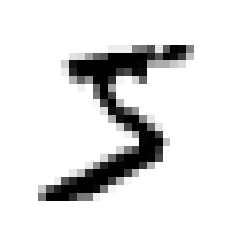

5


In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print(y[0])

### 1.2 Split of data, data shuffling
---
Luckily for us data shuffling has been done already by organizers, reasons why this is important
* reducing the chance for imbalanced dataset
* we shouldnt get similar rows  in the row -> some algorithms may perform worse - which?
---
Example:
* in gradient descent - in mini batch if i would be 'same cluster' then we would optimize to not true 'group', but to some subgrup

In [31]:
# lets train easy binary classifier - if it is 5 or not
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == '5') # True for all 5s, False for all other digits.
y_test_5 = (y_test == '5')

In [32]:
print(X_train.shape)
print(y_train_5.shape)
sum(y_train_5)

(60000, 784)
(60000,)


5421

In [33]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [72]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [70]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# cross_val_score(sgd_clf, X_train, y_train_5,  scoring="accuracy", cv = StratifiedKFold(3, random_state=1))

C:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([0.95035, 0.96035, 0.9604 ])

In [39]:
## test if simple cross val just take 1/cv for test, rest for train

In [73]:
X_train_cv = X_train[0:20000]
y_train_5_cv = y_train_5[0:20000]

X_train_cv_rest = X_train[20000:]
print(X_train_cv_rest.shape)

y_train_5_cv_rest = y_train_5[20000:]
print(y_train_5_cv_rest.shape)

sgd_clf.fit(X_train_cv_rest, y_train_5_cv_rest)
pred = sgd_clf.predict(X_train_cv)

(40000, 784)
(40000,)


### 1.2 What to remember from it
* Even in simple k-cross validation ( simple k-fold) data into each fold in selected randomly! (it is not chosen like first n% obser)

### 1.3 Types of cv
* simple k folds (divide dataset into k folds randomly (no in order, train on k-1, test on k, repeat on other field))
* leave one out - test on 1 , train on n-1
* stratified cv - 'ensure somehow' that our data is balanced (so we wont get a fold where there is only one class etc)

---
why to use cv
* we can use all data
* we can protect from imbalanced / biased / similar dataset
* way for tuning hyperparameters
* model stacking/ work on grouped datastructures